In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
PATH = r"C:\Git\Mushrooms_Edible_or_Poisonous\MushroomDataset\secondary_data.csv"
data = pd.read_csv(PATH, sep=';')
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [8]:
#We replace the values of the target class from "p" and "e" to "1" and "0" for covenience.
data['class'].replace({"p": 1, "e": 0 }, inplace = True)

In [11]:
print('The dataset has', data.shape[0], 'rows and', data.shape[1], 'columns')

The dataset has 61069 rows and 21 columns


### Dealing with null-values

We will drop features with around 10000 null-values of more, corresponding to roughly 1/6 of the database entries. 

In [12]:
data.isnull().sum().sort_values(ascending=False)

veil-type               57892
spore-print-color       54715
veil-color              53656
stem-root               51538
stem-surface            38124
gill-spacing            25063
cap-surface             14120
gill-attachment          9884
ring-type                2471
class                       0
stem-color                  0
habitat                     0
has-ring                    0
stem-width                  0
cap-diameter                0
stem-height                 0
gill-color                  0
does-bruise-or-bleed        0
cap-color                   0
cap-shape                   0
season                      0
dtype: int64

We drop the first eight features of the previous list

In [13]:
#Columns to drop
columns_drop=data.isnull().sum().sort_values(ascending=False)[:8].index.tolist()

In [14]:
data.drop(columns = columns_drop, inplace = True)

In order to deal with the null-values in the ring-type feature, lets first study some plots associated to it

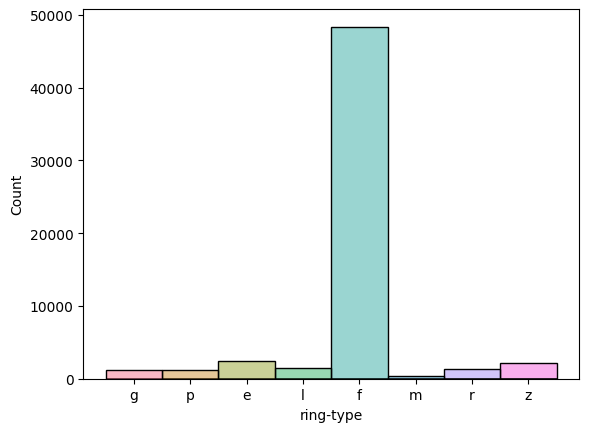

In [15]:
sns.set_palette('Spectral')
ax=sns.histplot(data, x='ring-type', hue = 'ring-type')
ax.legend_.remove()
plt.show()

From the previous plot we see that most samples have ring-type equal to f-type.

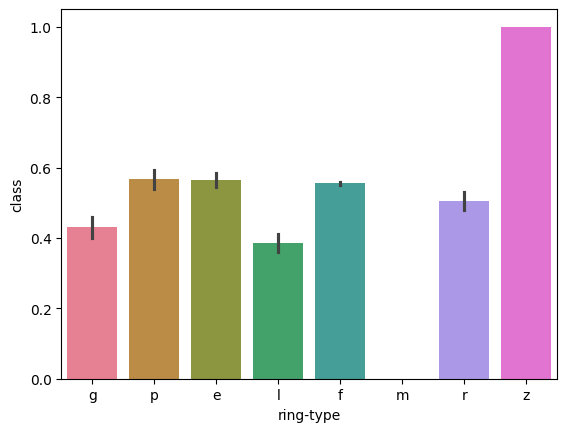

In [16]:
ax=sns.barplot(data, x='ring-type', y='class', hue='ring-type')
ax.legend_.remove()
plt.show()

Furthermore, the previous plot shows that the f ring-type does not distinguishes that well between poisonous and edible mushrooms, so we do not lose that much by setting ring-type equal to f for the missing values in ring type. 

In [17]:
data['ring-type'].fillna(value = 'f', inplace = True)

We double check that we have no more null values

In [18]:
print('Remaining null values: ', data.isnull().sum().sum())

Remaining null values:  0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-color            61069 non-null  object 
 6   stem-height           61069 non-null  float64
 7   stem-width            61069 non-null  float64
 8   stem-color            61069 non-null  object 
 9   has-ring              61069 non-null  object 
 10  ring-type             61069 non-null  object 
 11  habitat               61069 non-null  object 
 12  season                61069 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 6.1+ MB


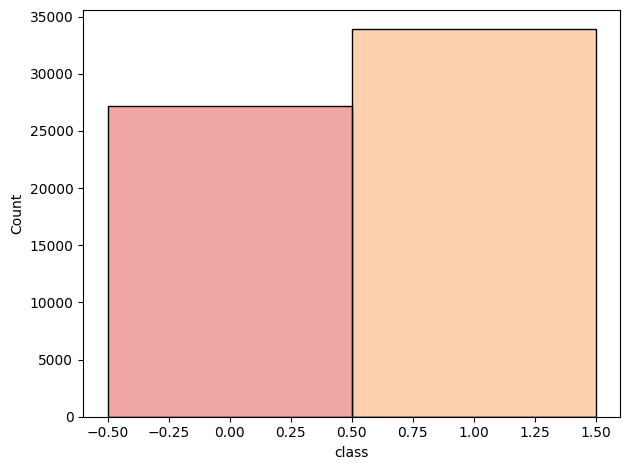

In [21]:
ax=sns.histplot(data, x='class', hue='class', discrete = True)
ax.legend_.remove()
plt.tight_layout()
plt.show()

We see that both classes are more or less balanced.

## Numerical features

We now study the relation between the numerical features and the target, in order to determine if they are able to distinguish between being edible or poisonous.

In [22]:
#Numerical features
num_cols = data.select_dtypes(include = 'number').columns 

In [23]:
data2=data.copy()
data2['class']=data2['class'].replace({1:'Poisonous', 0: 'Edible'})

In [24]:
data2.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


From the previous max values we see that presence of outliers is likely.

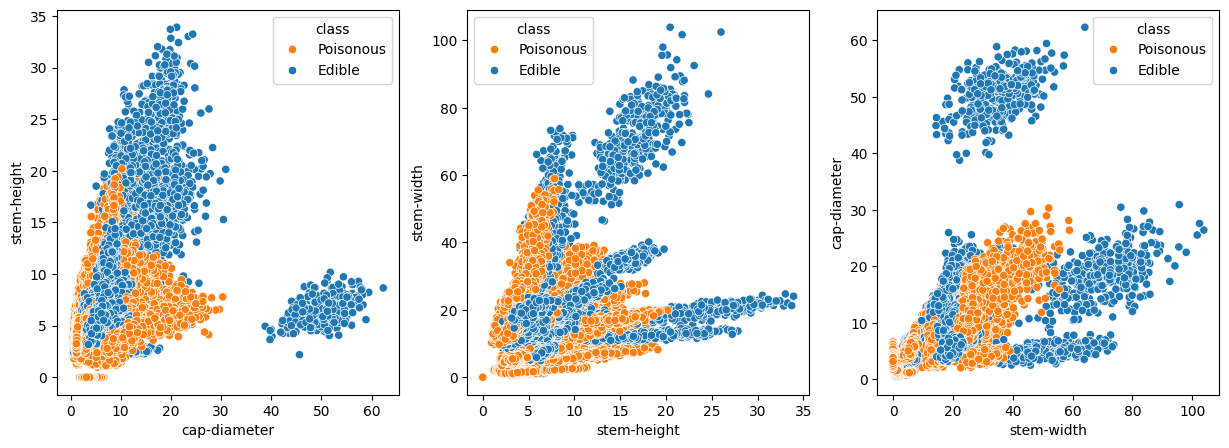

In [25]:
#Scatter plot of the numerical features colored by the values of the target
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(data2, x='cap-diameter', y='stem-height', hue ='class', palette={"Edible": "#1f77b4", "Poisonous": "#ff7f0e"})
plt.subplot(1,3,2)
sns.scatterplot(data2, x='stem-height', y='stem-width', hue ='class', palette={"Edible": "#1f77b4", "Poisonous": "#ff7f0e"})
plt.subplot(1,3,3)
sns.scatterplot(data2, x='stem-width', y='cap-diameter', hue ='class', palette={"Edible": "#1f77b4", "Poisonous": "#ff7f0e"})
plt.show()

From the previous plots we see that poisonous mushrooms tend to have smaller stem height, stem width, and cap diameter; compared to certain edible mushrooms. We also see the presence of several clusters of edible and poisonois mushrooms. Hence may use these features to distinguish between poisonous and edible mushrooms.  

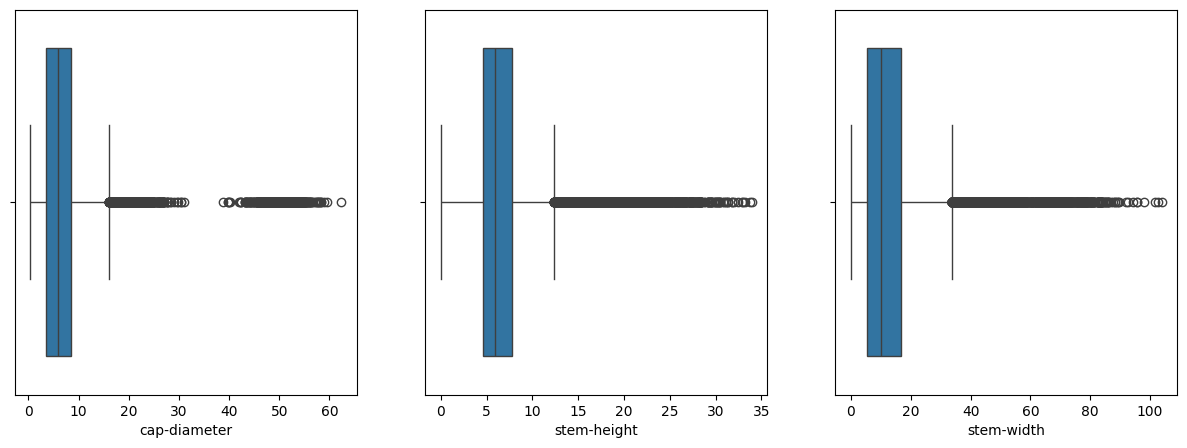

In [26]:
#Box plots of the numerical features
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data2, x='cap-diameter', color="#1f77b4")
plt.subplot(1,3,2)
sns.boxplot(data2, x='stem-height', color="#1f77b4")
plt.subplot(1,3,3)
sns.boxplot(data2, x='stem-width', color="#1f77b4")
plt.show()

From the boxplots we also se the presence of ourliers in all numerical features.

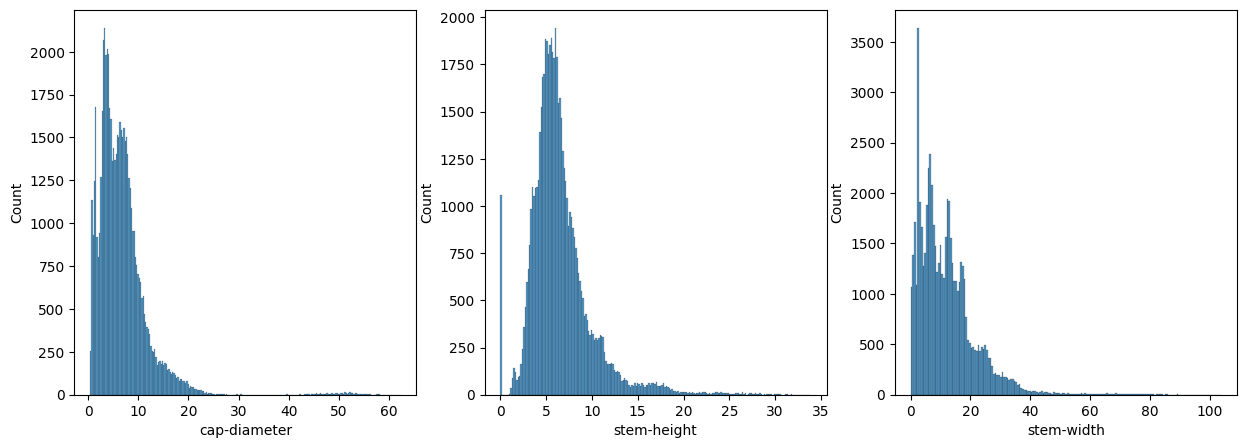

In [27]:
#Distribution of numerical features
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data2, x='cap-diameter', color="#1f77b4")
plt.subplot(1,3,2)
sns.histplot(data2, x='stem-height', color="#1f77b4")
plt.subplot(1,3,3)
sns.histplot(data2, x='stem-width', color="#1f77b4")
plt.show()

We also see that their distributions are skewed rather than normal. We will apply a log transform to make them more normal-distributed. This will help the performance of distance based models like SVM. We will also use many tree-based models, which are indifferent to whether the features are normally distributed or not. 

In [28]:
num_cols = num_cols.tolist()
num_cols.remove('class')
for col in num_cols:
    data2[col]=data2[col].apply(lambda x: np.log(x+1))
    data2.rename({col: 'Log-'+col}, axis=1, inplace = True)

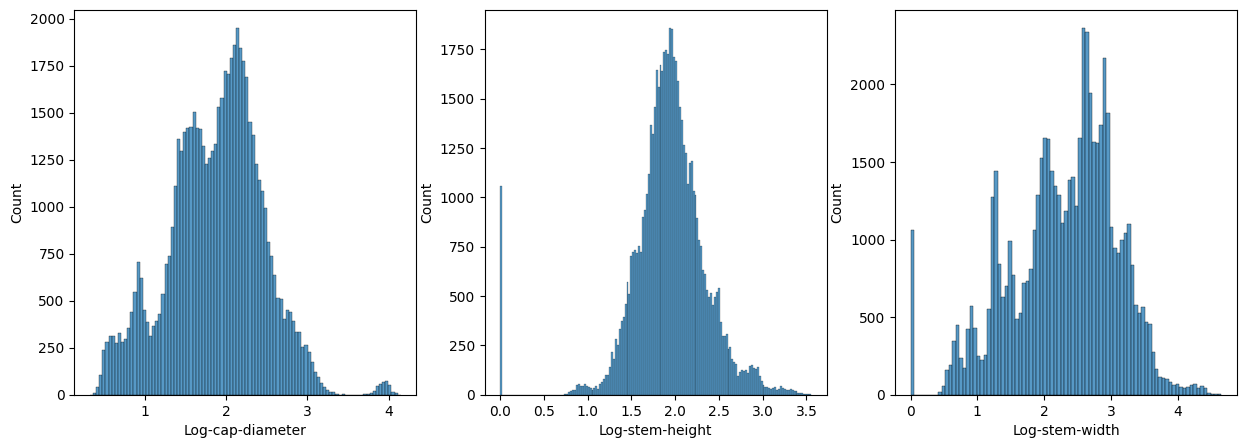

In [29]:
#Distribution after applying a log-transform
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data2, x='Log-cap-diameter', color="#1f77b4")
plt.subplot(1,3,2)
sns.histplot(data2, x='Log-stem-height', color="#1f77b4")
plt.subplot(1,3,3)
sns.histplot(data2, x='Log-stem-width', color="#1f77b4")
plt.show()

The features are now more normally distributed

### Study of categorical features

In [30]:
cat_cols = data2.select_dtypes(include = 'object').columns
cat_cols= cat_cols.tolist()
cat_cols.remove('class')

In [31]:
data3=data2.copy()
data3['class'].replace({'Poisonous': 1, 'Edible': 0}, inplace=True)

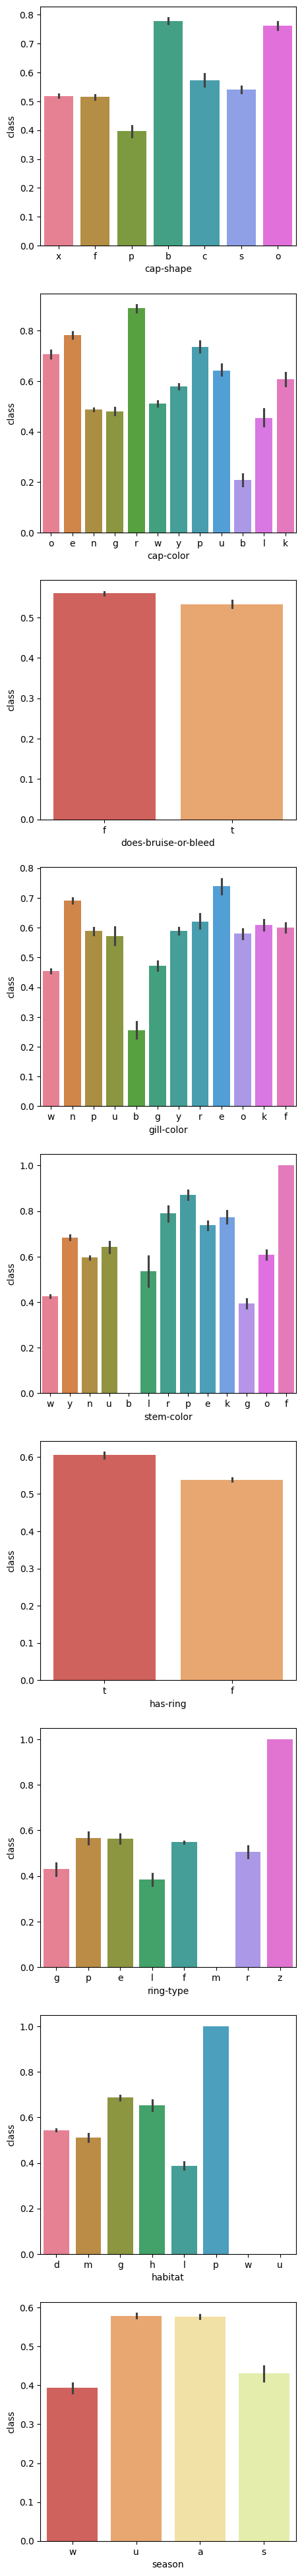

In [32]:
plt.figure(figsize=(5,50))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols),1, i+1)
    sns.barplot(data3, x=col, y='class', hue=col)
plt.show()

From the previous graphs we see that:
- Mushrooms with bell (b) cap-shapes or "other" (o) tend to be more poisonous on average.
- Mushrooms with cap colors of green (r), red (e), pink (p) or orange (o) tends to be more poisonous on average, while those with buff (b) color tend to be edible. 
- Mushrooms with gill-color of brown (n) or red (e) are usually more poisonous, while those with buff (b) color tend to be edible. 
- Mushrooms with a stem-color with no stem color (f)... (complete)
- Mushrooms in the summer (u) and autumn (a) seasons tend to be more poisonous than those in winter and spring 

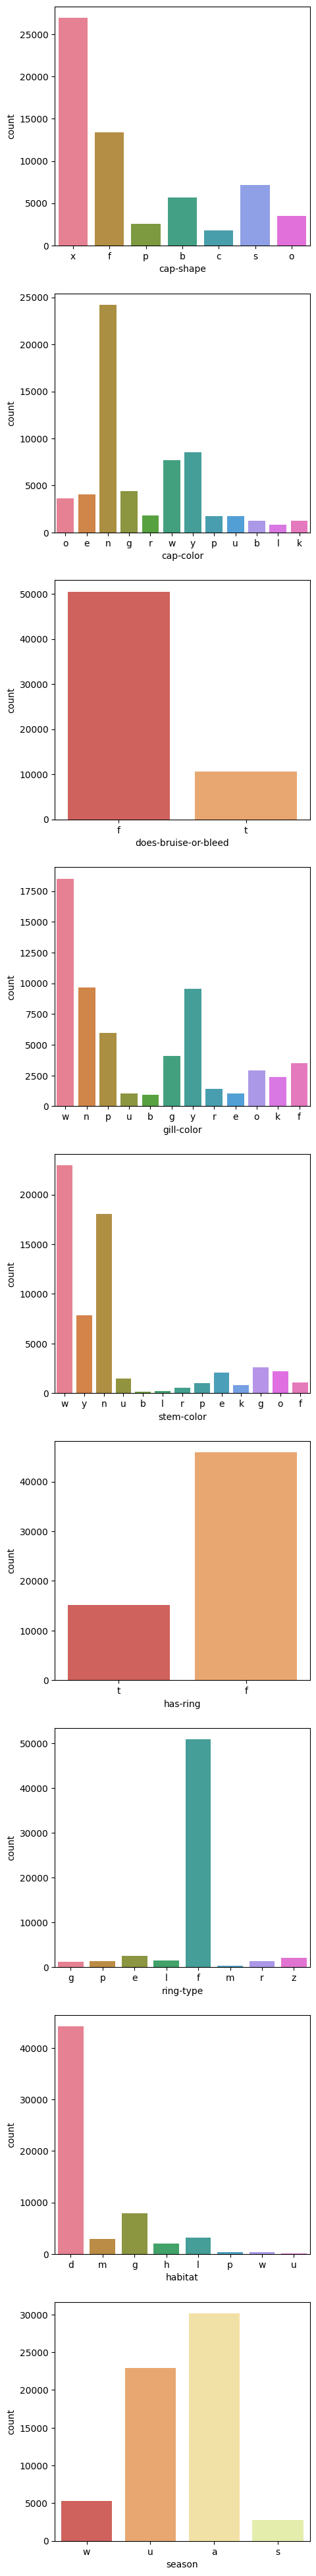

In [33]:
plt.figure(figsize=(5,50))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols),1, i+1)
    sns.countplot(data3, x=col, hue=col)
plt.show()

We see that many values of the features are unbalanced. We could try grouping some of their values together, but we will continue with the values as they are for now. 

### Train and test sets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
dataf=pd.get_dummies(data3)

In [36]:
X=dataf.iloc[:,1:]
y=dataf['class']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [38]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score

We normalize the data, which is only important for the logistic regression and SVM model

In [39]:
ss=StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

### SVM Model

In [42]:
param_grid = {'C': [0.1,1,10], 'kernel':['rbf','poly']}
model = SVC()


In [43]:
grid = GridSearchCV(model, param_grid=param_grid, scoring='recall', cv=3, verbose = 3)
grid.fit(X_train_ss,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .................C=0.1, kernel=rbf;, score=0.913 total time= 2.4min
[CV 2/3] END .................C=0.1, kernel=rbf;, score=0.915 total time= 2.3min
[CV 3/3] END .................C=0.1, kernel=rbf;, score=0.914 total time= 2.3min
[CV 1/3] END ................C=0.1, kernel=poly;, score=0.936 total time= 1.5min
[CV 2/3] END ................C=0.1, kernel=poly;, score=0.934 total time= 1.6min
[CV 3/3] END ................C=0.1, kernel=poly;, score=0.935 total time= 1.6min
[CV 1/3] END ...................C=1, kernel=rbf;, score=0.961 total time=  49.7s
[CV 2/3] END ...................C=1, kernel=rbf;, score=0.962 total time=  57.4s
[CV 3/3] END ...................C=1, kernel=rbf;, score=0.965 total time= 1.1min
[CV 1/3] END ..................C=1, kernel=poly;, score=0.955 total time=  40.9s
[CV 2/3] END ..................C=1, kernel=poly;, score=0.955 total time=  42.6s
[CV 3/3] END ..................C=1, kernel=poly;,

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'kernel': ['rbf', 'poly']}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [44]:
import pickle

In [45]:
svm = grid.best_estimator_
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm, f)
y_pred = svm.predict(X_test_ss)
print("Recall score:", recall_score(y_test, y_pred))

Recall score: 0.9839677387626635


### Random Forest model

In [46]:

rf_params = {"n_estimators": [100, 200 ,300], "max_features": ['sqrt', 'log2']}

rf = RandomForestClassifier()

grid_rf = GridSearchCV(rf, param_grid = rf_params, scoring = 'recall', cv = 3, verbose =3)

In [47]:
grid_rf.fit(X_train_ss, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END max_features=sqrt, n_estimators=100;, score=0.997 total time=   4.9s
[CV 2/3] END max_features=sqrt, n_estimators=100;, score=0.997 total time=   4.7s
[CV 3/3] END max_features=sqrt, n_estimators=100;, score=0.998 total time=   5.0s
[CV 1/3] END max_features=sqrt, n_estimators=200;, score=0.997 total time=   9.3s
[CV 2/3] END max_features=sqrt, n_estimators=200;, score=0.997 total time=   9.4s
[CV 3/3] END max_features=sqrt, n_estimators=200;, score=0.997 total time=   9.3s
[CV 1/3] END max_features=sqrt, n_estimators=300;, score=0.997 total time=  13.7s
[CV 2/3] END max_features=sqrt, n_estimators=300;, score=0.997 total time=  14.3s
[CV 3/3] END max_features=sqrt, n_estimators=300;, score=0.997 total time=  13.6s
[CV 1/3] END max_features=log2, n_estimators=100;, score=0.997 total time=   3.8s
[CV 2/3] END max_features=log2, n_estimators=100;, score=0.997 total time=   4.0s
[CV 3/3] END max_features=log2, n_esti

,estimator,RandomForestClassifier()
,param_grid,"{'max_features': ['sqrt', 'log2'], 'n_estimators': [100, 200, ...]}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [48]:
rf_model = grid_rf.best_estimator_
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)
y_pred = rf_model.predict(X_test_ss)
print("Recall score:", recall_score(y_test, y_pred))

Recall score: 0.9975410642274024


In [55]:
columns=dataf.iloc[:,1:].columns.tolist()

In [58]:
feature_importances = rf_model.feature_importances_

In [59]:
feat_df = pd.DataFrame({"Feature": columns, "Importance": feature_importances})

In [63]:
feat_df.sort_values(by= 'Importance', inplace = True, ascending = False)

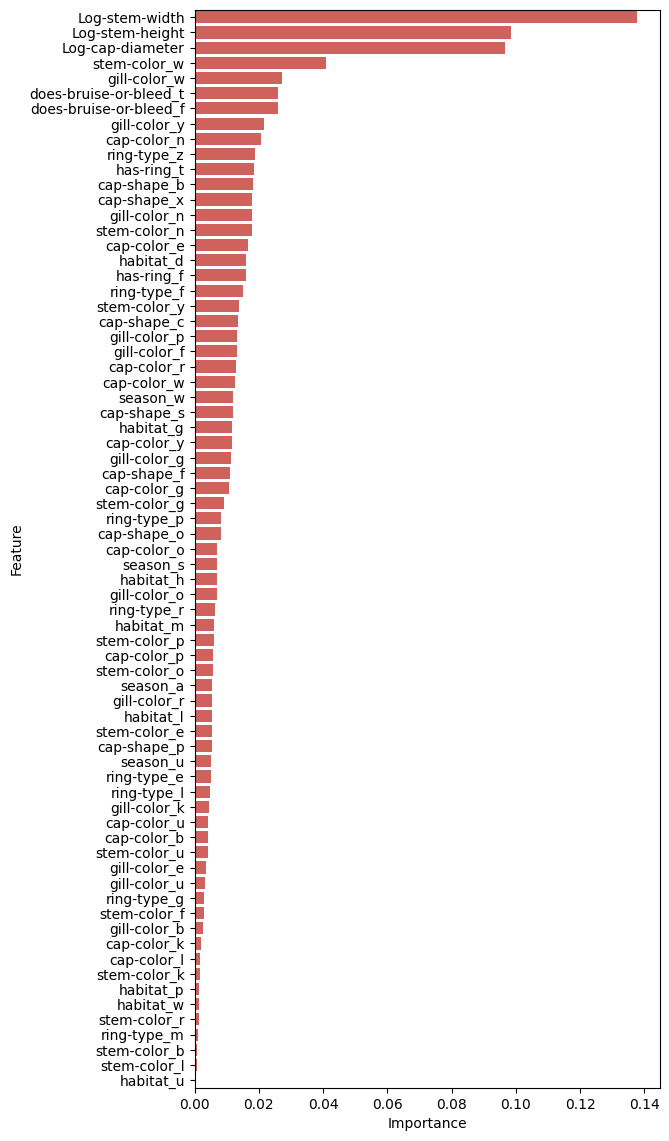

In [73]:
f.ax = plt.subplots(figsize=(6,14))
ax =sns.barplot(feat_df, y='Feature', x='Importance')
plt.show()

### Logistic Regression Model

In [78]:
param_grid = {'C': [0.01, 0.1,1]}
lr_model = LogisticRegression()
grid_lr = GridSearchCV(lr_model, param_grid=param_grid, scoring='recall', cv=3, verbose = 3)
grid_lr.fit(X_train_ss, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END ............................C=0.01;, score=0.781 total time=   0.2s
[CV 2/3] END ............................C=0.01;, score=0.793 total time=   0.2s
[CV 3/3] END ............................C=0.01;, score=0.784 total time=   0.1s
[CV 1/3] END .............................C=0.1;, score=0.780 total time=   0.2s
[CV 2/3] END .............................C=0.1;, score=0.792 total time=   0.1s
[CV 3/3] END .............................C=0.1;, score=0.784 total time=   0.1s
[CV 1/3] END ...............................C=1;, score=0.780 total time=   0.2s
[CV 2/3] END ...............................C=1;, score=0.792 total time=   0.2s
[CV 3/3] END ...............................C=1;, score=0.784 total time=   0.1s


,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...]}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [79]:
best_lr = grid_lr.best_estimator_
with open("lr_model.pkl", "wb") as f:
    pickle.dump(best_lr, f)
y_pred = best_lr.predict(X_test_ss)
print("Recall score:", recall_score(y_test, y_pred))

Recall score: 0.795416543719878


### XGBoost Model

In [87]:
param_grid = {'learning_rate': [0.6, 0.65, 0.7] }
xg_model = HistGradientBoostingClassifier()
grid_xg = GridSearchCV(xg_model, param_grid=param_grid, scoring='recall', cv=3, verbose = 3)
grid_xg.fit(X_train_ss, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .................learning_rate=0.6;, score=0.996 total time=   1.7s
[CV 2/3] END .................learning_rate=0.6;, score=0.996 total time=   1.6s
[CV 3/3] END .................learning_rate=0.6;, score=0.997 total time=   1.3s
[CV 1/3] END ................learning_rate=0.65;, score=0.995 total time=   1.2s
[CV 2/3] END ................learning_rate=0.65;, score=0.996 total time=   1.7s
[CV 3/3] END ................learning_rate=0.65;, score=0.997 total time=   1.8s
[CV 1/3] END .................learning_rate=0.7;, score=0.995 total time=   1.4s
[CV 2/3] END .................learning_rate=0.7;, score=0.995 total time=   1.9s
[CV 3/3] END .................learning_rate=0.7;, score=0.986 total time=   0.6s


,estimator,HistGradientB...ngClassifier()
,param_grid,"{'learning_rate': [0.6, 0.65, ...]}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [88]:
best_xg = grid_xg.best_estimator_
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(best_xg, f)
y_pred = best_xg.predict(X_test_ss)
print("Recall score:", recall_score(y_test, y_pred))

Recall score: 0.9960657027638438
